In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy.random as random

In [79]:
def square_lattice(i,j, Lx = None, Ly = None): 
    ''' Square lattice with close boundary conditions
    '''
    neighbours = []
    if i+1<Lx:
        neighbours.append([i+1,j])
    if i-1> -1:
        neighbours.append([i-1,j])
    if j+1<Ly:
        neighbours.append([i,j+1])
    if j-1> -1:
        neighbours.append([i,j-1])
        
    return neighbours
    
class game:
    def __init__(self, H, Memb = None, Ls = None, lattice = square_lattice):
        '''
        
        Input:
         - H: initial hamiltonian that will be translated to architecture 
         - Memb: Number of sites where embedded hamiltonian is defined
         - Ls: tuple with linear sizes if Memb is not a perfect root
         - lattice: function that for site i,j gives a list of neighbours, e.g.
                     [[i+1,j],[i-1,j],[i,j+1],[i+1,j-1]]
                     (default: square lattice with closed boundary conditions)
         
        Methods implemented:
         ....
        '''
        # Copy of the original hamiltonian 
        self.H = np.array(H)
        # Copy of the hamiltonian that will be used for the game
        self.Hrest = np.array(H)

        # number of spins
        self.nS = H.shape[0]
        
        if Memb is None:
            self.Hemb = H*0.0
            self.Memb = self.nS
        else:
            self.Hemb = np.zeros((Memb, Memb))
            self.Memb = Memb
        
        # whether it has been used or not        
        self.usedS = np.zeros(self.Memb)
        # array of unique spins
        self.uniqS = np.zeros(self.Memb, dtype=int)-1
        # indices of original spin that it might be copy of
        self.origS = np.zeros(self.Memb) 
        
        # Linear sizes
        if Ls is None:
            L = np.int(np.sqrt(self.Memb))
            self.Lx, self.Ly = L, L
        else:
            self.Lx, self,Ly = Ls[0], Ls[1]
        
        # Number of spins and unique spins
        self.N = 0
        self.N0 = 0
        # lattice function
        self.lattice = lattice
        
        # State: turn of copying or adding a new one
        self.copyadd = 1
        
        
    def get_state(self):
        return self.Hnew, self.copyadd
    
    def get_poss_actions(self):
        actions = []
        if self.copyadd:
            pass
        else:
            pass
        
    
    def __len__(self):
        return self.N
    
    def copy_spin(self, i, j):
        if i<0 or i>N:
            return 0
        if j<0 or j>N:
            return 0
        
        self.N += 1
        self.Hemb[i,j] = 1.0
        self.Hemb[j,i] = 1.0
        
    #     def add_new_spin(self, i, interactions = [[0,0]]):
    #         '''
    #           - i: index of original spin or row in hamiltonian
    #           - interactions: list of pairs, where each pair:
    #                            [column of interacting term, index of neighbour]
    #         '''
    #         self.uniqS[i] = N0
    #         self.usedS[N] = 1


    #         # Interacting terms that we use
    #         sel = np.arange(nS)[np.abs(self.Hrest[N0,:])>0.0]
    #         idx_terms = np.array([i for i,j in interactions])
    #         int_terms = 1.0*self.Hrest[i,sel[idx_terms]]
    #         # Remove those from Hrest
    #         self.Hrest[i,sel[idx_terms]] = 0.0

    #         neighbours = self.get_neighbours(i)[np.array([j for i,j in interactions])]
    #         for site, jint in zip(neighbours, int_terms):
    #             j = site[1]*self.Lx+site[0]
    #             j0 = self.uniqS[j]
    #             if j0>-1:
    #                 # if self.usedS[j]==1:
    #                 #     self.Hemb[i,j] = jint
    #                 #     self.Hemb[j,i] = jint
    #                 # print(j)
    #                 self.Hemb[i,j] = jint
    #                 self.Hemb[j,i] = jint

    #         self.N += 1
    #         self.N0 += 1
    
    def add_new_spin(self, i):
        '''
          - i: index of new spin or row in hamiltonian
          
        '''
        if self.uniqS[i]==-1:
            self.uniqS[i] = self.N0
            self.usedS[i] = 1


            # Interacting terms that we use
            h0 = self.Hrest[self.N0, self.N0]*1.0
            self.Hrest[self.N0, self.N0] = 0.0

            self.Hemb[i,i] = h0

            self.N += 1
            self.N0 += 1
        else:
            #It's already occupied
            pass
    
    def copy_spin(self, i, j, fer_int = 1.0):
        if self.uniqS[i]> -1:
            self.uniqS[j] = self.uniqS[i]
            self.Hemb[i,j] = fer_int
            self.Hemb[j,i] = fer_int

            self.N += 1
        else:
            #Nothing!
            pass
            
    def add_interaction(self, i, j):
        '''
          - i, j: indices of (neighbouring) sites to connect
        '''
        
        i0 = self.uniqS[i] 
        j0 = self.uniqS[j]
        
        if i0> -1 and j0> -1:
            jint = self.Hrest[i0,j0]
            print(jint,i0,j0)
            self.Hemb[i,j] = jint
            self.Hemb[j,i] = jint

            self.Hrest[i0,j0] = 0.0
            self.Hrest[j0,i0] = 0.0
        else:
            # At least one of them does not exists
            pass
        
        
    def get_neighbours(self, i):
        ix, iy = i%self.Lx, i//self.Lx
        return self.lattice(ix, iy, self.Lx, self.Ly)
    
    def print(self):
        for i in range(self.Hemb.shape[0]):
            stre = self.Memb*'{:.2f} '
            print(stre.format(*self.Hemb[i,:]))
            
    def plot(self, ax = None, **kwargs):
        if ax is None:
            fig, ax = plt.subplots(1,1, **kwargs)
        
        idc0 = np.arange(self.Memb)
        idcs = idc0[self.usedS==1]
        ix, iy = idcs%self.Lx, idcs//self.Lx
        
        ax.scatter(ix,iy)
        
        #print(idcs)
        xx = []
        yy = []
        uu = []
        vv = []
        cc = []
        if len(idcs)>2:
            for i0, i in enumerate(idcs):
                ix0, iy0 = i%self.Lx, i//self.Lx
                idc1 = idc0[np.abs(self.Hemb[i,:])>0]
                sel = idc1!= i 
                if len(idc1[sel])>0:
                    idc1 = idc1[sel]
                    ix1, iy1 = idc1%self.Lx, idc1//self.Lx
                    
                    xx.extend(ix0+ix1*0)
                    yy.extend(iy0+iy1*0) 
                    uu.extend(ix1-ix0) 
                    vv.extend(iy1-iy0)
                    cc.extend(1+self.Hemb[i,idc1]/2.0)
                    
        ax.quiver(xx,yy,uu,vv,cc,
            scale = self.Lx, headwidth = 0, cmap='seismic' )
            
        #ax.quiver
        ax.set_aspect('equal')
        #ax.set_clim(-1,1)

        ax.set_xlim(-0.05,self.Lx+0.05)
        ax.set_ylim(-0.05,self.Ly+0.05)
        return fig, ax

In [80]:
Hint = random.randn(9,9)

In [81]:
Hint = Hint +Hint.transpose()

In [82]:
newg = game(Hint, Memb = 16)

In [83]:
newg.Memb

16

-0.8481665353504342 0 1
-0.5411308232318629 0 3


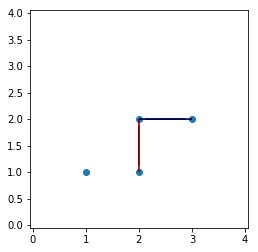

In [84]:
newg.add_new_spin(10)
newg.add_new_spin(11)
newg.add_interaction(10,11)
newg.add_new_spin(5)
newg.add_new_spin(6)
newg.add_interaction(10,6)

#newg.add_new_spin(11)
#newg.add_new_spin(15)
#newg.add_new_spin(7)

fig, ax = newg.plot()
#ax.quiver([[0,1,2], [1,1,1]],[1,1,1],[0,0,0,0,0,0])

In [85]:
newg.print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 -1.89 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.52 0.00 0.00 0.00 -0.54 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 -0.54 0.00 0.00 0.00 -1.57 -0.85 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -0.85 -2.63 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0